<a href="https://colab.research.google.com/github/hafizaiqra736/iqraolympics/blob/main/CS_Students_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['cs_students.csv']
   Student ID           Name  Gender  Age  GPA             Major  \
0           1     John Smith    Male   21  3.5  Computer Science   
1           2  Alice Johnson  Female   20  3.2  Computer Science   
2           3   Robert Davis    Male   22  3.8  Computer Science   
3           4   Emily Wilson  Female   21  3.7  Computer Science   
4           5  Michael Brown    Male   23  3.4  Computer Science   

         Interested Domain             Projects                 Future Career  \
0  Artificial Intelligence  Chatbot Development   Machine Learning Researcher   
1             Data Science       Data Analytics                Data Scientist   
2     Software Development   E-commerce Website             Software Engineer   
3          Web Development   Full-Stack Web App                 Web Developer   
4            Cybersecurity     Network Security  Information Security Analyst   

    Python     SQL     Java  
0   Strong  Strong     Weak  
1  Average  Strong     W

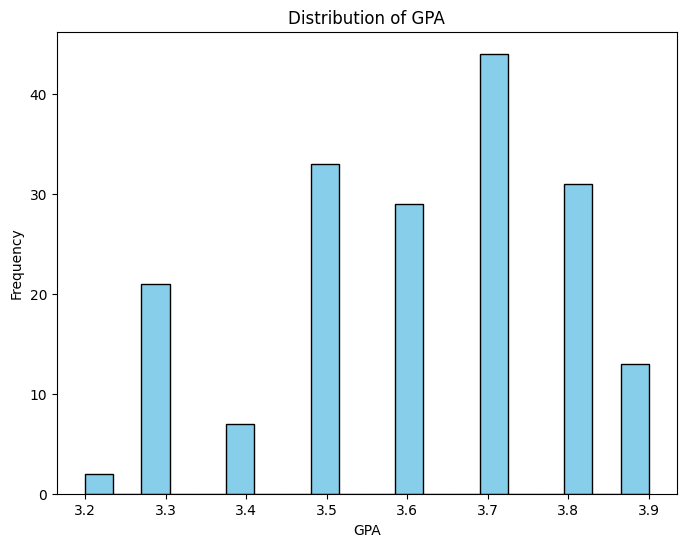

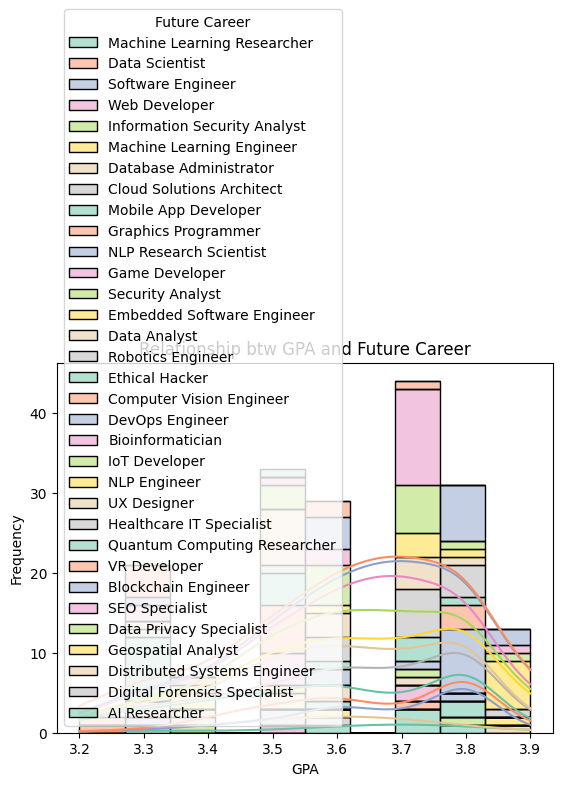

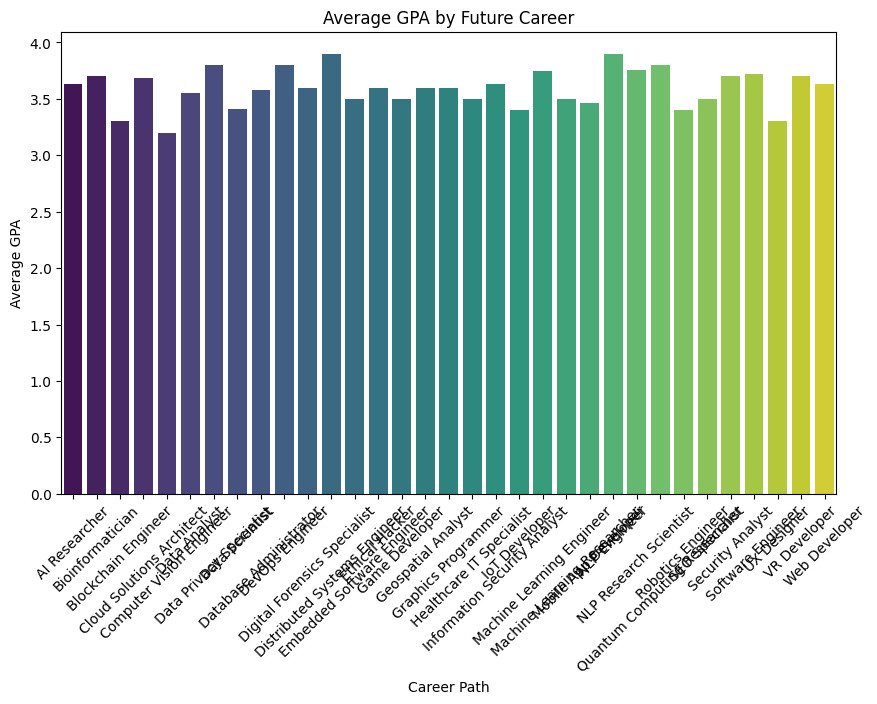

<ipython-input-1-dff3fe5ebc05>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Future Career', palette='Set2')


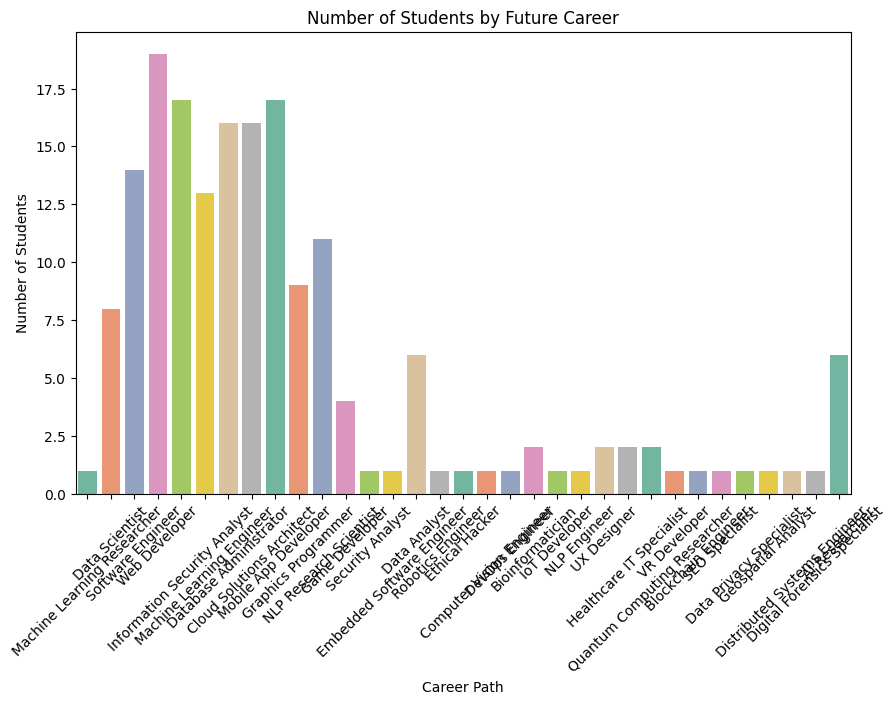

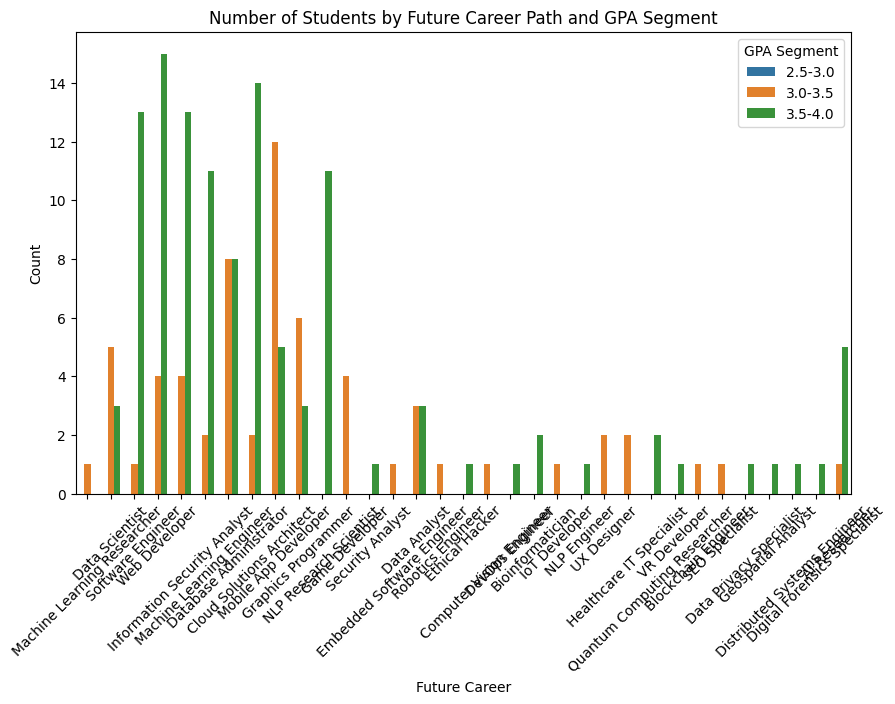

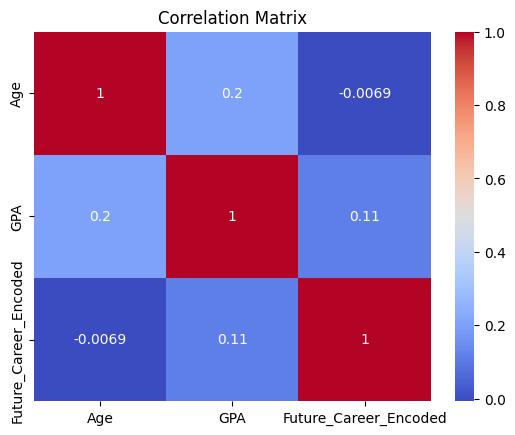

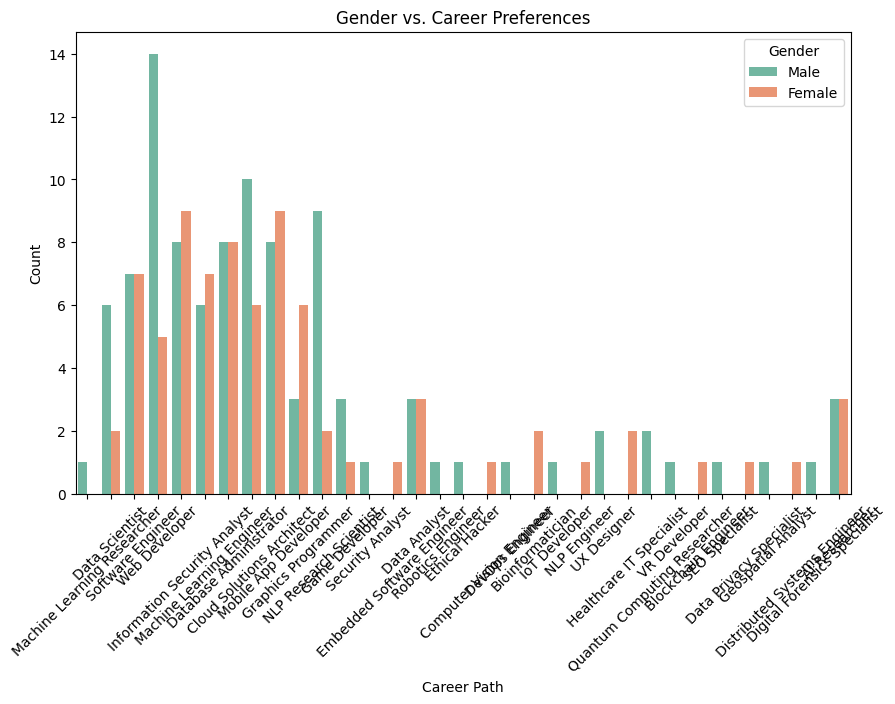

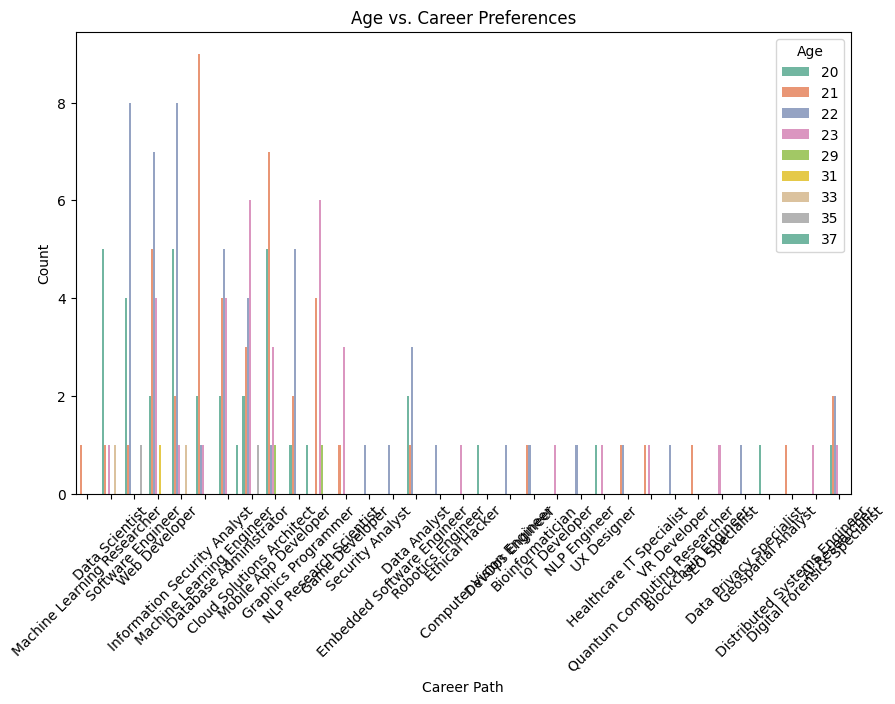

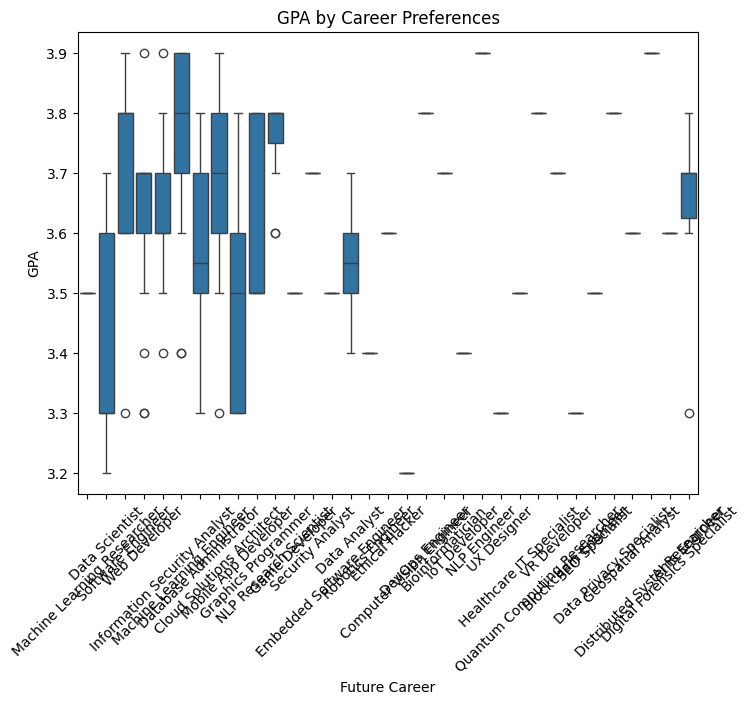

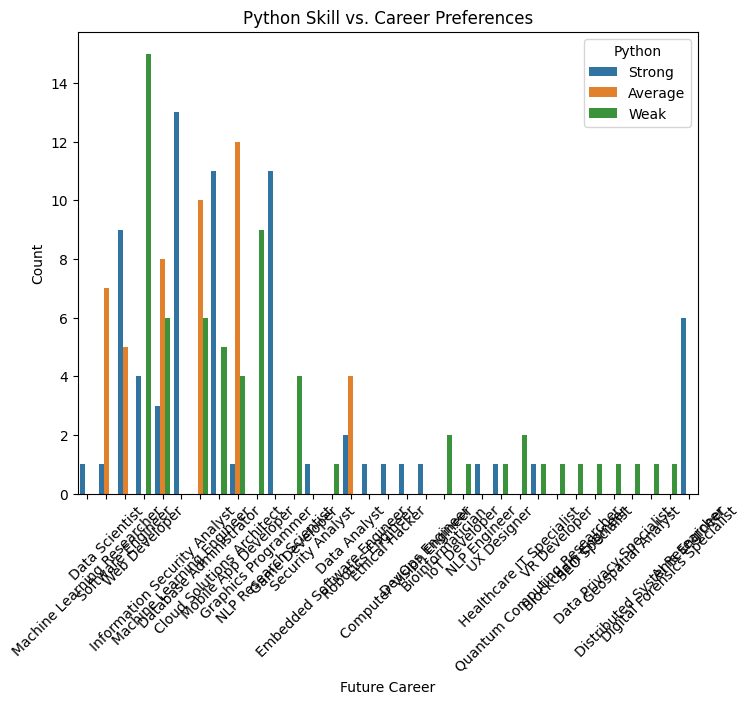

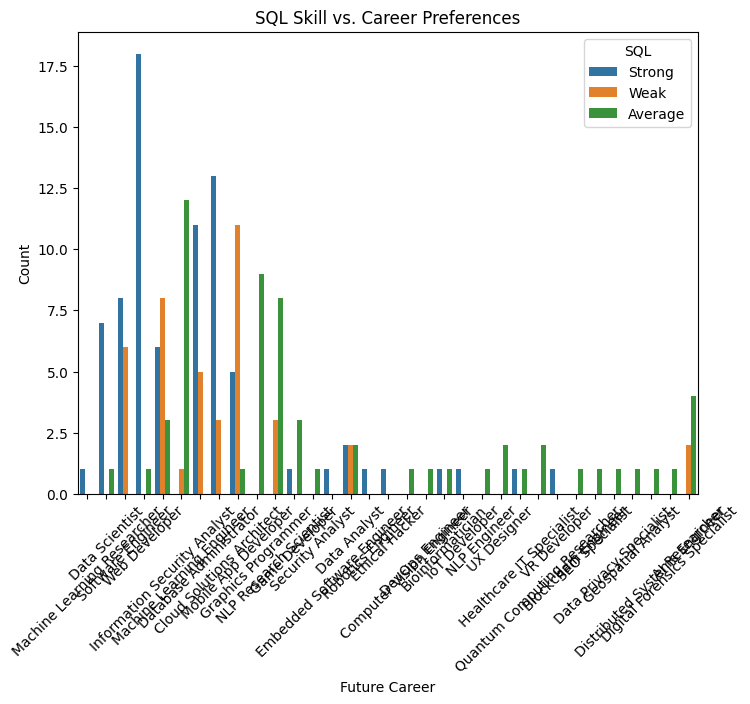

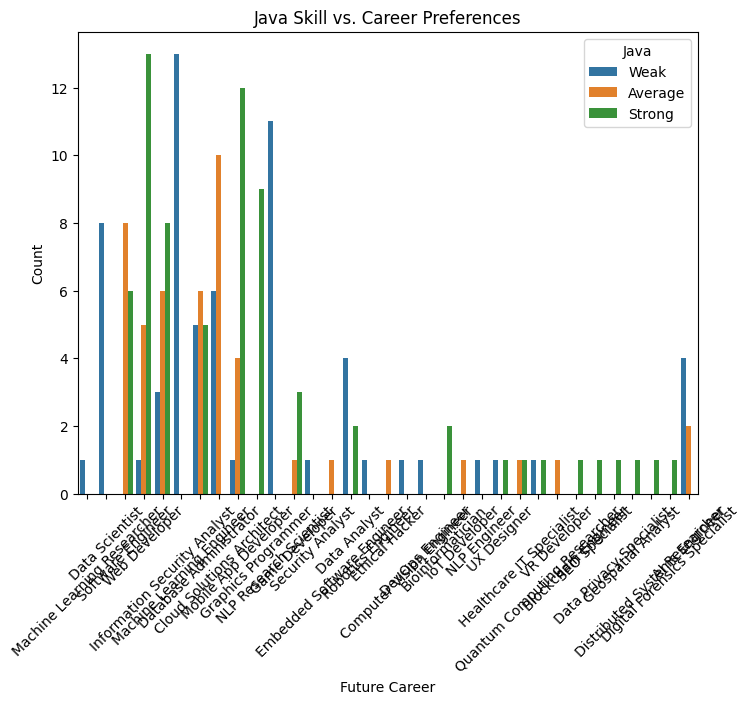

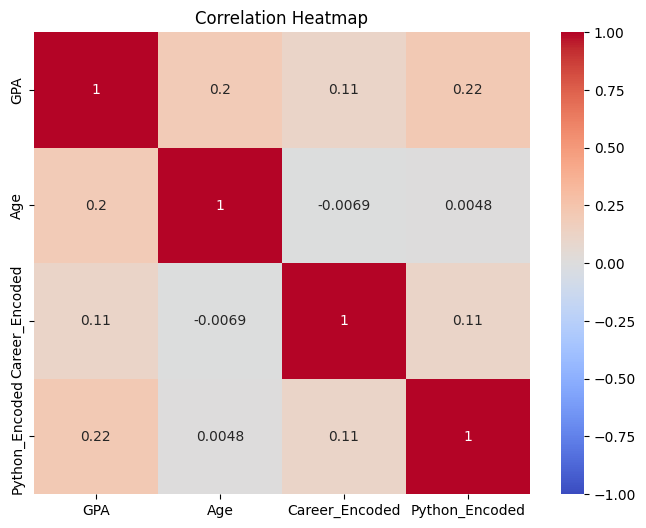

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     GPA  Age                 Future Career   Python  Cluster
0    3.5   21   Machine Learning Researcher   Strong        1
1    3.2   20                Data Scientist  Average        1
2    3.8   22             Software Engineer   Strong        0
3    3.7   21                 Web Developer     Weak        0
4    3.4   23  Information Security Analyst  Average        1
..   ...  ...                           ...      ...      ...
175  3.7   22                 Web Developer     Weak        0
176  3.6   20  Information Security Analyst   Strong        1
177  3.4   21     Machine Learning Engineer   Strong        1
178  3.5   22        Database Administrator     Weak        1
179  3.7   23     Cloud Solutions Architect   Strong        1

[180 rows x 5 columns]


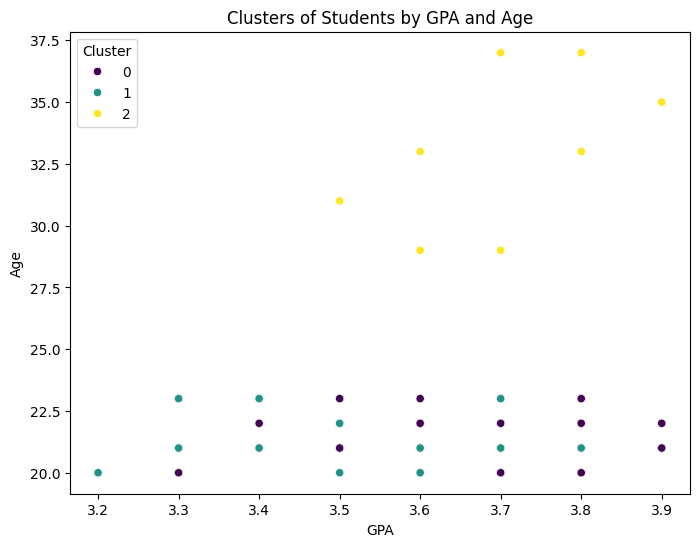

Cluster Centers (in scaled space):
[[ 0.58133862 -0.19228712  0.84140764  0.31273251]
 [-0.48871838 -0.21904998 -0.63178172 -0.2211087 ]
 [ 0.60629801  3.94487315  0.05465009 -0.12898007]]
Cluster Centers (in original scale):
[[ 3.71780822 21.57534247 25.42465753  1.34246575]
 [ 3.52857143 21.5        10.89795918  0.92857143]
 [ 3.72222222 33.22222222 17.66666667  1.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

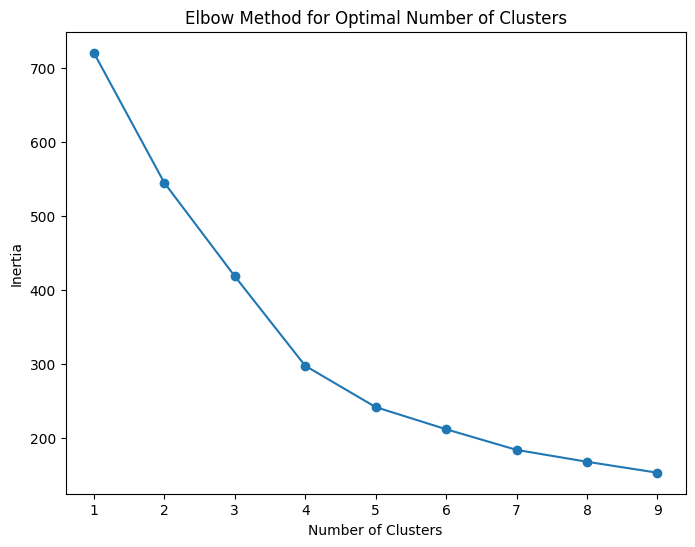

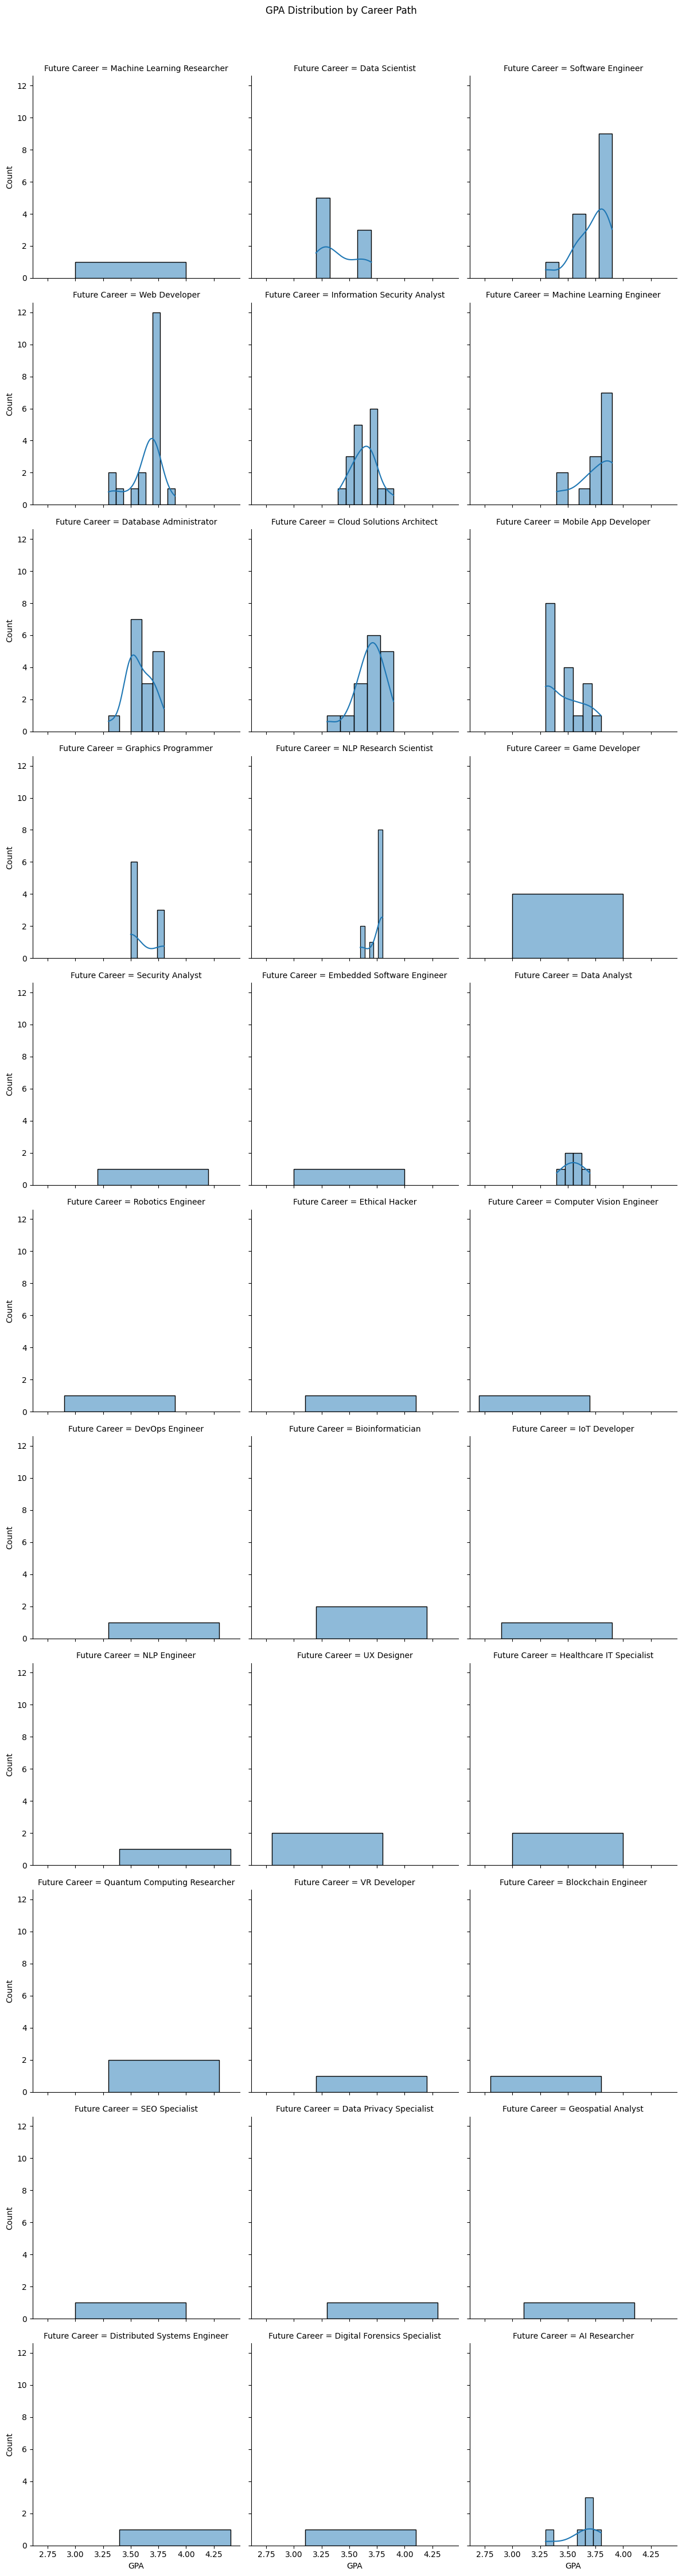

In [1]:
import zipfile
import os

zip_path =  '/content/archive.zip'
e = '/content/data'

with zipfile.ZipFile(zip_path, 'r')as zip_ref:
  zip_ref.extractall(e)
print(os.listdir(e))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data =  pd.read_csv('/content/data/cs_students.csv')
df = pd.DataFrame(data)
# exploring dataset
print(df.head(5))
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.dtypes)
print(df.value_counts())

# Data Cleaning
# standarize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df['GPA'].values.reshape(-1, 1))
print(df_scaled)

# one-hot encoding
df_enocded = pd.get_dummies(df, columns=['Gender', 'Major', 'Interested Domain', 'Future Career', 'Python', 'SQL', 'Java'])
print(df_enocded)

# Exploratory Data Analysis

# Visulize distribution
plt.figure(figsize=(8, 6))
plt.hist(df['GPA'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

import seaborn as sns
# Visualize relationship
sns.histplot(data=df, x='GPA', hue='Future Career', multiple='stack', palette='Set2', kde=True)
plt.title('Relationship btw GPA and Future Career')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

# calculate average GPA for each career path
career_gpa = df.groupby('Future Career')['GPA'].mean().reset_index()

# Create a bar plot for average GPA by career path
plt.figure(figsize=(10, 6))
sns.barplot(x='Future Career', y='GPA', data=career_gpa, palette='viridis', hue='Future Career', legend=False)
plt.title('Average GPA by Future Career')
plt.xlabel('Career Path')
plt.ylabel('Average GPA')
plt.xticks(rotation=45)
plt.show()

# Create a count plot for the number of students by career path
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Future Career', palette='Set2')
plt.title('Number of Students by Future Career')
plt.xlabel('Career Path')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

# Create GPA segments for better visualization in count plot
df['GPA_Segment'] = pd.cut(df['GPA'], bins=[2.5, 3.0, 3.5, 4.0], labels=['2.5-3.0', '3.0-3.5', '3.5-4.0'])
#Create a count plot with hue based on GPA segments
plt.figure(figsize=(10, 6))
sns.countplot(x='Future Career', hue='GPA_Segment', data=df)
plt.title('Number of Students by Future Career Path and GPA Segment')
plt.xlabel('Future Career')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='GPA Segment')
plt.show()


from sklearn.preprocessing import LabelEncoder

# Encode categorical columns like 'Future Career'
le = LabelEncoder()
df['Future_Career_Encoded'] = le.fit_transform(df['Future Career'])

# Now, find the correlation including the encoded column
correlation_matrix = df[['Age', 'GPA','Future_Career_Encoded']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Gender vs. Career Preferences
plt.figure(figsize=(10, 6))
sns.countplot(x='Future Career', hue='Gender', data=df, palette='Set2')
plt.title('Gender vs. Career Preferences')
plt.xlabel('Career Path')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Age vs. Career Preferences
plt.figure(figsize=(10, 6))
sns.countplot(x='Future Career', hue='Age', data=df, palette='Set2')
plt.title('Age vs. Career Preferences')
plt.xlabel('Career Path')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a box plot for GPA vs. Career Preferences
plt.figure(figsize=(8, 6))
sns.boxplot(x='Future Career', y='GPA', data=df)

plt.title('GPA by Career Preferences')
plt.xlabel('Future Career')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.show()

# Create a count plot for Python Skill vs. Career Preferences
plt.figure(figsize=(8, 6))
sns.countplot(x='Future Career', hue='Python', data=df)

plt.title('Python Skill vs. Career Preferences')
plt.xlabel('Future Career')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# create countplot for SQL Skills vs. Career Preference

plt.figure(figsize=(8, 6))
sns.countplot(x='Future Career', hue='SQL', data=df)

plt.title('SQL Skill vs. Career Preferences')
plt.xlabel('Future Career')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a count plot for Java Skill vs. Career Preferences

plt.figure(figsize=(8, 6))
sns.countplot(x='Future Career', hue='Java', data=df)

plt.title('Java Skill vs. Career Preferences')
plt.xlabel('Future Career')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Encode 'Future Career' and technical skills as numeric labels
le = LabelEncoder()
df['Career_Encoded'] = le.fit_transform(df['Future Career'])
df['Python_Encoded'] = le.fit_transform(df['Python'])

# Calculate the correlation matrix
correlation_matrix = df[['GPA', 'Age', 'Career_Encoded', 'Python_Encoded']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.show()


from sklearn.cluster import KMeans
# Select relevant columns for clustering
X = df[['GPA', 'Age', 'Career_Encoded', 'Python_Encoded']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters as needed
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

print(df[['GPA', 'Age', 'Future Career', 'Python', 'Cluster']])

#  Analyzing and Visualizing the Clusters
# Scatter plot of GPA vs Age, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GPA', y='Age', hue='Cluster', data=df, palette='viridis')

plt.title('Clusters of Students by GPA and Age')
plt.xlabel('GPA')
plt.ylabel('Age')
plt.show()

# Display the cluster centers (these are in scaled space)
print("Cluster Centers (in scaled space):")
print(kmeans.cluster_centers_)

# Convert the cluster centers back to the original scale
cluster_centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (in original scale):")
print(cluster_centers_original)

# Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Create a FacetGrid for GPA by Career Path
g = sns.FacetGrid(df, col='Future Career', col_wrap=3, height=4)
g.map(sns.histplot, 'GPA', kde=True)

plt.suptitle('GPA Distribution by Career Path', y=1.02)
plt.show()





